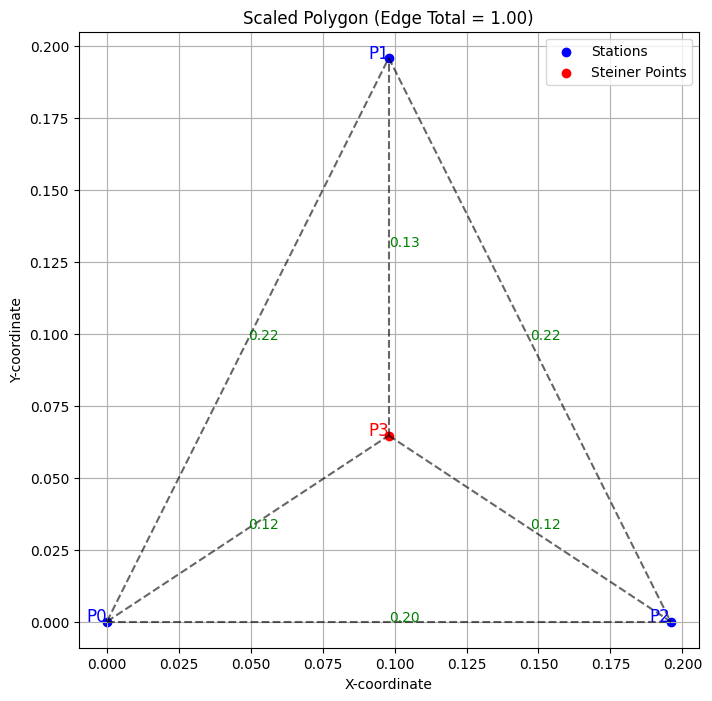


---------------------------------LR1 Print statements------------------------
Status: Optimal
Objective Value: -32.83541100936893
-----------------------------------------------------------------------------


---------------------------------LR2 Print statements------------------------
Solver Status: Optimal
Objective Value: 2.4075563932784574
-----------------------------------------------------------------------------

LR1 Solution: -32.83541100936893
LR2 Solution: 2.4075563932784574
Total Solution: -30.427854616090475

----------------------in solution 1a ZUB----------------

Status: Optimal
Objective Value: 0.8650578550784188

-----------------------------------------------------------


---------------- Iteration 0 ----------------
ZLB: -30.427854616090475
ZUB: 0.8650578550784188
GAP: 31.292912471168894
------------------------------------------------


---------------------------------LR1 Print statements------------------------
Status: Optimal
Objective Value: -32.835411009368

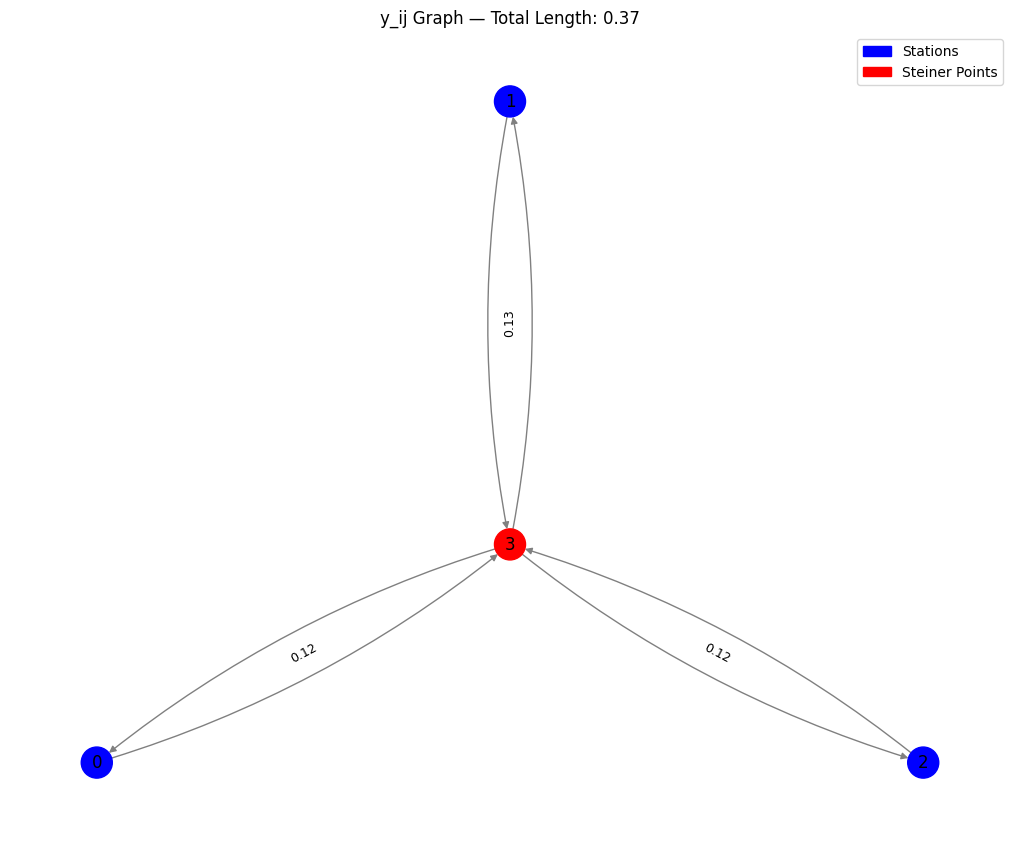

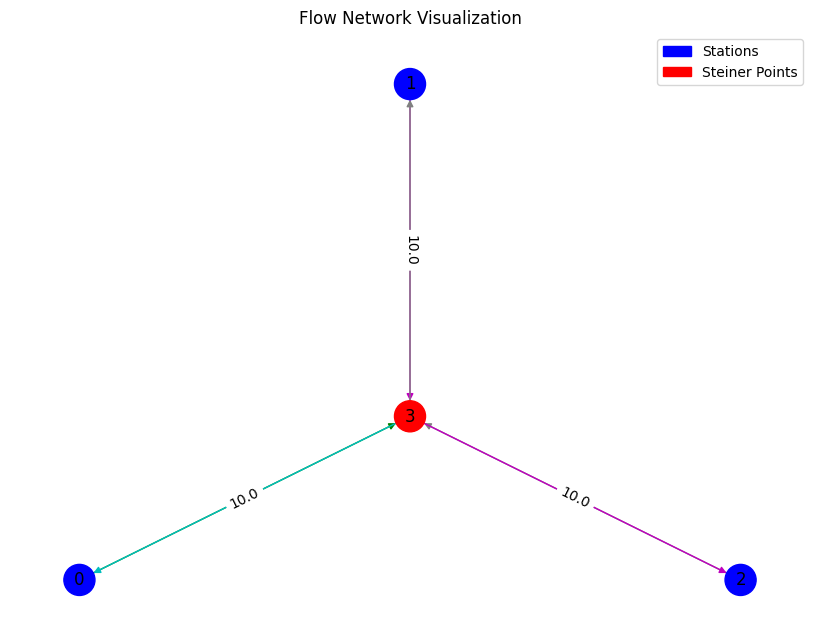

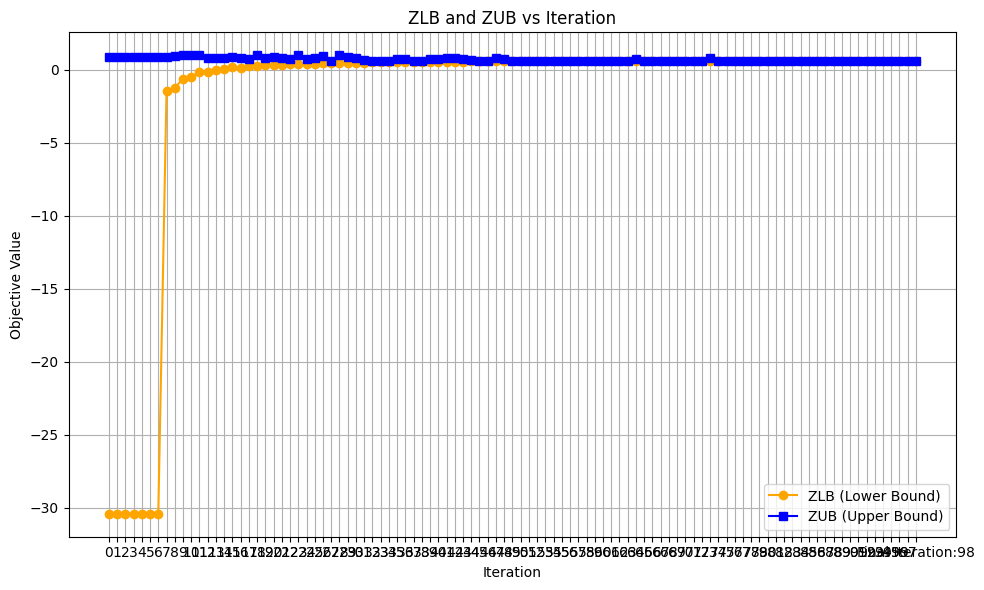

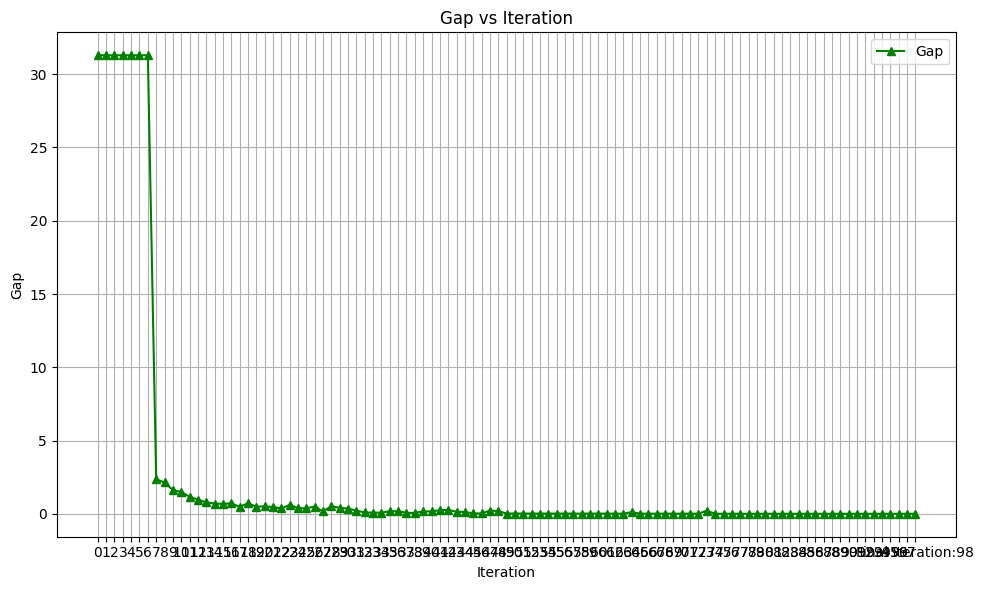

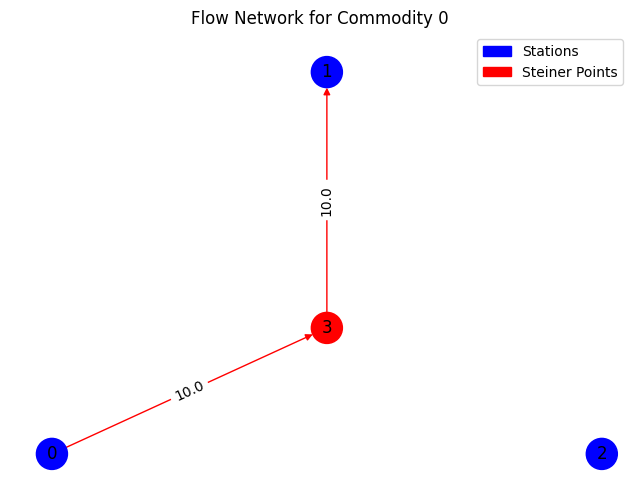

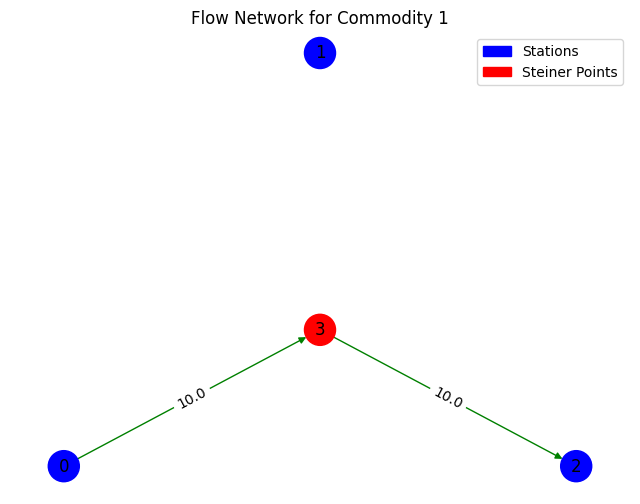

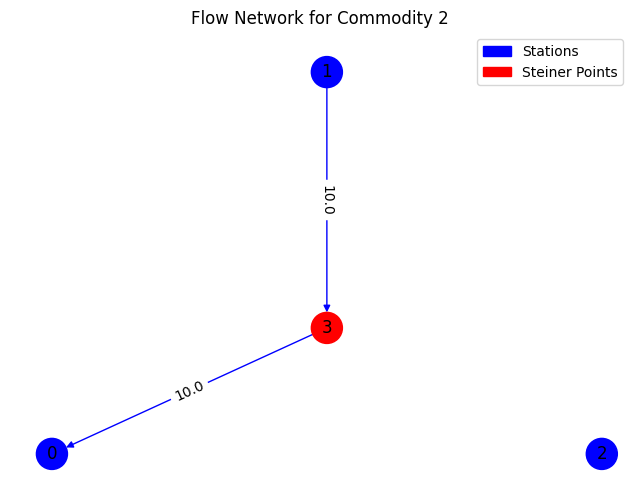

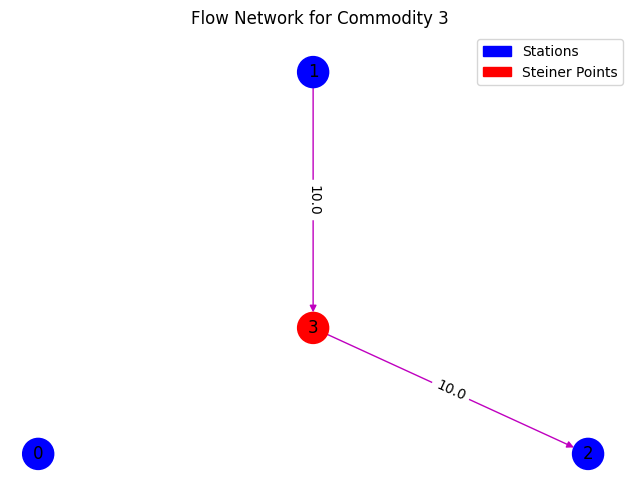

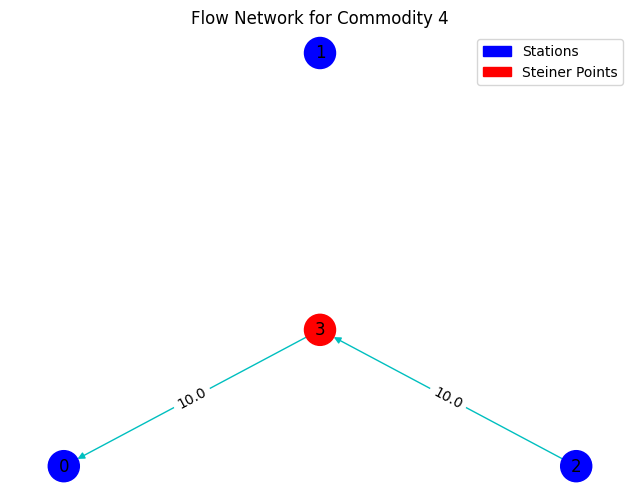

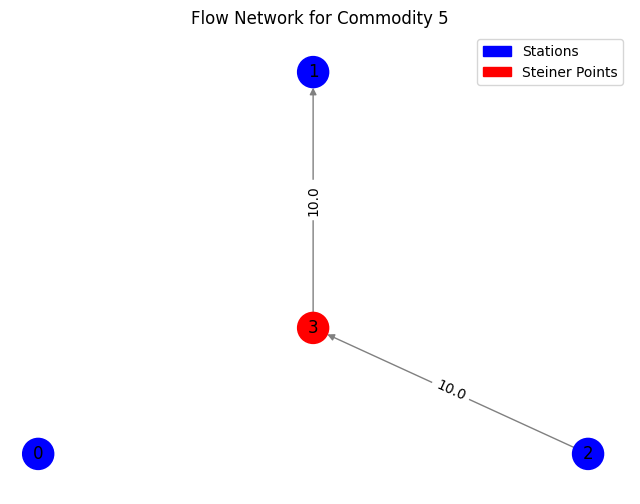

In [2]:
from scale_graph import adjust_polygon_to_edge_length, plot_scaled_polygon
from solution_zub_and_zlb import get_zub_zlb
from subgradient_lambda import update_lambda
from data_store_csv import write_to_csv
import numpy as np
import random
from plots import yij_graph, fij_graph, individual_fij_graph, plot_bounds_vs_iteration, plot_gap_vs_iteration

# input points for the graph as coordinates (x, y)
stations = [(0, 0), (1, 2), (2, 0)]
setiners = [(1, 0.66)]
intermediate_nodes = []

# Total nodes including stations, setiners and intermediate nodes
input_points = stations + setiners + intermediate_nodes

# Total arcs (i, j) where i, j are nodes i.e 0th, 1st , 2nd etc... and i->j is the direction of the arc and only one direction is considered
edges_input = [(0, 1), (0, 2), (1, 2), (0, 3), (3, 1), (3, 2)]

#scale the input graph to have overall distance to target lenth
adjusted_points, total_perimeter = adjust_polygon_to_edge_length(input_points, edges_input, 1)

#plot the scaled graph
plot_scaled_polygon(adjusted_points, total_perimeter, edges_input, stations, setiners, intermediate_nodes)

# Making both direction arcs
edges_input += [(j, i) for (i, j) in edges_input]

# Convert the points to a list of tuples
optimized_points = [tuple(point) for point in adjusted_points]

# Initialize the costs
edge_cost = 1

speed = 30
alpha = 0.5
beta = 0.5
stop_criteria = 1e-3
n = 0

# Capacity of the edges
capacity = {
    (0, 1) : 1000,
    (0, 2) : 1000,
    (1, 2) : 1000,
    (0, 3) : 1000,
    (1, 3) : 1000,
    (2, 3) : 1000
}

# Making the capacity dictionary symmetric
for (i, j), cap in list(capacity.items()):
    if (j, i) not in capacity:
        capacity[(j, i)] = cap

# Commodities are the pairs of nodes (i, j) with a demand i.e (source, destination, demand)
commodities = {
    0 : (0, 1, 10), 
    1 : (0, 2, 10), 
    2 : (1, 0, 10),
    3 : (1, 2, 10),
    4 : (2, 0, 10),
    5 : (2, 1, 10),
}

# Initialize the lambda values for each commodity and edge
lambda_k = {(k, i, j) : random.random() for k in commodities for (i, j) in edges_input}
lambda_n = np.array(list(lambda_k.values()))

data = []
theta_n = 0
s_lambda = 0

while True:
    zub, zlb, fij, yij, y_ub, f_ub = get_zub_zlb(optimized_points, stations, edge_cost, lambda_k, speed, capacity, alpha, beta, edges_input, commodities)
    
    gap = zub - zlb

    print()
    print(f"---------------- Iteration {n} ----------------")
    print(f"ZLB: {zlb}")
    print(f"ZUB: {zub}")
    print(f"GAP: {gap}")
    print(f"------------------------------------------------")

    iteration_wise_data = {"Iteration":n, "ZLB":zlb, "ZUB":zub, "GAP":gap, "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
    data.append(iteration_wise_data)
    write_to_csv(data)
    print()
    
    if gap <= stop_criteria:
        print("------------- Stopping Criteria Met ------------")
        print(f"Iterations: {n}")
        print(f"Final ZLB: {zlb}")
        print(f"Final ZUB: {zub}")
        print(f"Final GAP: {gap}")
        print(f"------------------------------------------------")
        final_data = {"Iteration":f"Final Iteration:{n+1}", "ZLB":f"{zlb}", "ZUB":f"{zub}", "GAP":f"{gap}", "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
        data.append(final_data)
        break
    else:
        n += 1

        lambda_k, s_lambda_dict, theta_n = update_lambda(lambda_k, fij, yij, zub, zlb, commodities, edges_input, n)
        lambda_n = np.array(list(lambda_k.values()))
        s_lambda = np.array(list(s_lambda_dict.values()))

write_to_csv(data)

yij_graph(optimized_points, stations, setiners, intermediate_nodes)
fij_graph(optimized_points, commodities, stations, setiners, intermediate_nodes)
plot_bounds_vs_iteration()
plot_gap_vs_iteration()
individual_fij_graph(optimized_points, commodities,stations, setiners, intermediate_nodes)

In [ ]:
from scale_graph import adjust_polygon_to_edge_length, plot_scaled_polygon
from solution_zub_and_zlb import get_zub_zlb
from subgradient_lambda import update_lambda
from data_store_csv import write_to_csv
import numpy as np
import random
from plots import yij_graph, fij_graph, individual_fij_graph, plot_bounds_vs_iteration, plot_gap_vs_iteration

# input points for the graph as coordinates (x, y)
stations = [(0, 0), (0, 1), (1, 1), (1, 0)]
steiners = [(0.5, 0.5)]
intermediate_nodes = []

# Total nodes including stations, setiners and intermediate nodes
input_points = stations + steiners + intermediate_nodes

# Total arcs (i, j) where i, j are nodes i.e 0th, 1st , 2nd etc... and i->j is the direction of the arc and only one direction is considered
edges_input = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (1, 4), (2, 4), (3, 4)]

#scale the input graph to have overall distance to target lenth
adjusted_points, total_perimeter = adjust_polygon_to_edge_length(input_points, edges_input, 140)

#plot the scaled graph
plot_scaled_polygon(adjusted_points, total_perimeter, edges_input, stations, steiners, intermediate_nodes)

# Making both direction arcs
edges_input += [(j, i) for (i, j) in edges_input]

# Convert the points to a list of tuples
optimized_points = [tuple(point) for point in adjusted_points]

station_cost = 1 * len(stations)
steiner_cost = 6 * len(steiners)
edge_cost = 1

speed = 30
alpha = 0.5
beta = 0.5
stop_criteria = 1e-3
n = 0

# Capacity of the edges
capacity = {
    (0, 1) : 1000,
    (1, 2) : 1000,
    (2, 3) : 1000,
    (3, 0) : 1000,
    (0, 4) : 1000,
    (1, 4) : 1000,
    (2, 4) : 1000,
    (3, 4) : 1000
}

# Making the capacity dictionary symmetric
for (i, j), cap in list(capacity.items()):
    if (j, i) not in capacity:
        capacity[(j, i)] = cap

# Commodities are the pairs of nodes (i, j) with a demand i.e (source, destination, demand)
commodities = {
    0 : (0, 1, 10), 
    1 : (0, 2, 10),
    2 : (0, 3, 10),
    3 : (1, 0, 10),
    4 : (1, 2, 10),
    5 : (1, 3, 10),
    6 : (2, 0, 10),
    7 : (2, 1, 10),
    8 : (2, 3, 10),
    9 : (3, 0, 10),
    10 : (3, 1, 10),
    11 : (3, 2, 10),
}

# Initialize the lambda values for each commodity and edge
lambda_k = {(k, i, j) : random.random() for k in commodities for (i, j) in edges_input}
lambda_n = np.array(list(lambda_k.values()))

data = []
theta_n = 0
s_lambda = 0

while True:
    zub, zlb, fij, yij, y_ub, f_ub = get_zub_zlb(optimized_points, station_cost, steiner_cost, edge_cost, lambda_k, speed, capacity, alpha, beta, edges_input, commodities)
    
    gap = zub - zlb

    print()
    print(f"---------------- Iteration {n} ----------------")
    print(f"ZLB: {zlb}")
    print(f"ZUB: {zub}")
    print(f"GAP: {gap}")
    print(f"------------------------------------------------")

    iteration_wise_data = {"Iteration":n, "ZLB":zlb, "ZUB":zub, "GAP":gap, "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
    data.append(iteration_wise_data)
    write_to_csv(data)
    print()
    
    if gap <= stop_criteria:
        print("------------- Stopping Criteria Met ------------")
        print(f"Iterations: {n}")
        print(f"Final ZLB: {zlb}")
        print(f"Final ZUB: {zub}")
        print(f"Final GAP: {gap}")
        print(f"------------------------------------------------")
        final_data = {"Iteration":f"Final Iteration:{n+1}", "ZLB":f"{zlb}", "ZUB":f"{zub}", "GAP":f"{gap}", "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
        data.append(final_data)
        break
    else:
        n += 1

        lambda_k, s_lambda_dict, theta_n = update_lambda(lambda_k, fij, yij, zub, zlb, commodities, edges_input, n)
        lambda_n = np.array(list(lambda_k.values()))
        s_lambda = np.array(list(s_lambda_dict.values()))

write_to_csv(data)

yij_graph(input_points, stations, steiners, intermediate_nodes)
fij_graph(input_points, commodities, stations, steiners, intermediate_nodes)
plot_bounds_vs_iteration()
plot_gap_vs_iteration()
individual_fij_graph(input_points, commodities,stations, steiners, intermediate_nodes)

In [ ]:
from scale_graph import adjust_polygon_to_edge_length, plot_scaled_polygon
from solution_zub_and_zlb import get_zub_zlb
from subgradient_lambda import update_lambda
from data_store_csv import write_to_csv
import numpy as np
import random
from plots import yij_graph, fij_graph, individual_fij_graph, plot_bounds_vs_iteration, plot_gap_vs_iteration

def get_new_lambda(lambda_n, fij, yij, zub, zlb, commodities, arcs, n):
    lambda_new, theta_n, s_lambda = update_lambda(lambda_n, fij, yij, zub, zlb, commodities, arcs, n)
    return lambda_new, theta_n, s_lambda

# Example input points (initial polygon)
stations = [(4, 0), (6, 0), (6, 1), (1, 1), (4, 2), (6, 3), (4, 3), (0, 3), (2, 4), (5, 5), (0, 5), (3, 7), (5, 7)]
steiners = [(4, 1), (2, 3), (2, 5), (3, 5), (4, 6), (6, 5)]
intermediate_nodes = [(1, 0), (6, 2), (1, 2), (1, 3), (5, 3), (5, 4), (0, 4), (0, 7), (6, 7)]

# Total nodes including stations, setiners and intermediate nodes
input_points = stations + steiners + intermediate_nodes

# Total arcs (i, j) where i, j are nodes i.e 0th, 1st , 2nd etc... and i->j is the direction of the arc and only one direction is considered
edges_input = [(19, 0), (0, 1), (1, 2), (2, 13), (13, 3), (0, 13), (19, 3), (3, 21), (21, 4), (4, 13), (4, 20), (20, 2), (20, 5), (5, 23), (23, 6), (6, 14), (14, 22), (22, 21), (22, 7), (7, 25), (25, 8), (8, 24), (24, 23), (5, 18), (18, 9), (9, 24), (9, 16), (16, 15), (15, 8), (15, 10), (10, 26), (26, 11), (11, 16), (11, 17), (17, 9), (17, 12), (9, 12), (11, 12), (12, 27), (27, 18), (14, 8), (25, 10), (16, 17)]
#scale the input graph to have overall distance to target lenth
adjusted_points, total_perimeter = adjust_polygon_to_edge_length(input_points, edges_input, 140)

#plot the scaled graph
plot_scaled_polygon(adjusted_points, total_perimeter, edges_input, stations, steiners, intermediate_nodes)

# Making both direction arcs
edges_input += [(j, i) for (i, j) in edges_input]

# Convert the points to a list of tuples
optimized_points = [tuple(point) for point in adjusted_points]

station_cost = 0 * len(stations)
steiner_cost = 0 * len(steiners)
edge_cost = 1 

speed = 30
alpha = 0.5
beta = 0.5
stop_criteria = 0.9
n = 0

# Capacity of the edges
capacity = {
    (i, j): 1000 for (i, j) in edges_input
}

# commodities are the pairs of nodes (i, j) with a demand i.e (source, destination, demand)
commodities = {
    0 : (11, 10, 10), 
    1 : (11, 12, 180),
    2 : (10, 7, 180),
    3 : (7, 3, 180),
    4 : (7, 4, 180),
    5 : (7, 6, 180),
    6 : (6, 4, 180),
    7 : (6, 3, 180),
    8 : (6, 5, 180),
    9 : (6, 8, 180),
    10 : (8, 9, 180),
    11 : (6, 9, 180),
    12 : (9, 12, 180),
    13 : (12, 15, 180),
    14 : (5, 9, 180),
    15 : (5, 4, 180),
    16 : (5, 2, 180),
    17 : (2, 4, 180),
    18 : (4, 3, 180),
    19 : (2, 1, 180),
    20 : (0, 1, 180),
    21 : (10, 11, 180)
}

# Initialize the lambda values for each commodity and edge
lambda_k = {(k, i, j) : random.random() for k in commodities for (i, j) in edges_input}
lambda_n = np.array(list(lambda_k.values()))

data = []
theta_n = 0
s_lambda = 0

while True:
    zub, zlb, fij, yij, y_ub, f_ub = get_zub_zlb(optimized_points, station_cost, steiner_cost, edge_cost, lambda_k, speed, capacity, alpha, beta, edges_input, commodities)
    
    gap = zub - zlb

    print()
    print(f"---------------- Iteration {n} ----------------")
    print(f"ZLB: {zlb}")
    print(f"ZUB: {zub}")
    print(f"GAP: {gap}")
    print(f"------------------------------------------------")

    iteration_wise_data = {"Iteration":n, "ZLB":zlb, "ZUB":zub, "GAP":gap, "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
    data.append(iteration_wise_data)
    write_to_csv(data)
    print()
    
    if gap <= stop_criteria:
        print("------------- Stopping Criteria Met ------------")
        print(f"Iterations: {n}")
        print(f"Final ZLB: {zlb}")
        print(f"Final ZUB: {zub}")
        print(f"Final GAP: {gap}")
        print(f"------------------------------------------------")
        final_data = {"Iteration":f"Final Iteration:{n+1}", "ZLB":f"{zlb}", "ZUB":f"{zub}", "GAP":f"{gap}", "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
        data.append(final_data)
        break
    else:
        n += 1

        lambda_k, s_lambda_dict, theta_n = update_lambda(lambda_k, fij, yij, zub, zlb, commodities, edges_input, n)
        lambda_n = np.array(list(lambda_k.values()))
        s_lambda = np.array(list(s_lambda_dict.values()))

write_to_csv(data)

yij_graph(input_points, stations, steiners, intermediate_nodes)
fij_graph(input_points, commodities, stations, steiners, intermediate_nodes)
plot_bounds_vs_iteration()
plot_gap_vs_iteration()
individual_fij_graph(input_points, commodities,stations, steiners, intermediate_nodes)

In [ ]:
from scale_graph import adjust_polygon_to_edge_length, plot_scaled_polygon
from solution_zub_and_zlb import get_zub_zlb
from subgradient_lambda import update_lambda
from data_store_csv import write_to_csv
import numpy as np
import random
from plots import yij_graph, fij_graph, individual_fij_graph, plot_bounds_vs_iteration, plot_gap_vs_iteration

def get_new_lambda(lambda_n, fij, yij, zub, zlb, commodities, arcs, n):
    lambda_new, theta_n, s_lambda = update_lambda(lambda_n, fij, yij, zub, zlb, commodities, arcs, n)
    return lambda_new, theta_n, s_lambda

# Example input points (initial polygon)
stations = [(0.4080460088785464, 0.9385412416095369), (0.9432291668209997, 0.3438906396577681), (-1.0, -0.34678940898999433), (-0.8729408951874096, 0.4421446485920259), (0.18701487601789635, 0.20570883116806118), (-0.3518018984506692, 0.9262292596593948), (0.9178928248984451, -0.39880446550243565), (-0.31165488588842266, -0.9808148980860291), (-0.3375106298022389, -0.26217776686311106), (0.4177254327128518, -0.867928081245215)]
steiners = []
intermediate_nodes = []

# Total nodes including stations, setiners and intermediate nodes
input_points = stations + steiners + intermediate_nodes

# Total arcs (i, j) where i, j are nodes i.e 0th, 1st , 2nd etc... and i->j is the direction of the arc and only one direction is considered
edges_input = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
#scale the input graph to have overall distance to target lenth
adjusted_points, total_perimeter = adjust_polygon_to_edge_length(input_points, edges_input, 100)

#plot the scaled graph
plot_scaled_polygon(adjusted_points, total_perimeter, edges_input, stations, steiners, intermediate_nodes)

# Making both direction arcs
edges_input += [(j, i) for (i, j) in edges_input]

# Convert the points to a list of tuples
optimized_points = [tuple(point) for point in adjusted_points]

station_cost = 0 * len(stations)
steiner_cost = 0 * len(steiners)
edge_cost = 1 

speed = 30
alpha = 0.5
beta = 0.5
stop_criteria = 1
n = 0

# Capacity of the edges
capacity = {
    (i, j): 1000 for (i, j) in edges_input
}

# commodities are the pairs of nodes (i, j) with a demand i.e (source, destination, demand)
commodities = {
    k: (i, j, 10)
    for k, (i, j) in enumerate(
        ( (i, j) for i in range(len(stations)) for j in range(len(stations)) if i != j )
    )
}

print(f"--------------total commodities: {len(commodities)}------------------")

# Initialize the lambda values for each commodity and edge
lambda_k = {(k, i, j) : random.random() for k in commodities for (i, j) in edges_input}
lambda_n = np.array(list(lambda_k.values()))

data = []
theta_n = 0
s_lambda = 0

while True:
    zub, zlb, fij, yij, y_ub, f_ub = get_zub_zlb(optimized_points, station_cost, steiner_cost, edge_cost, lambda_k, speed, capacity, alpha, beta, edges_input, commodities)
    
    gap = zub - zlb

    print()
    print(f"---------------- Iteration {n} ----------------")
    print(f"ZLB: {zlb}")
    print(f"ZUB: {zub}")
    print(f"GAP: {gap}")
    print(f"------------------------------------------------")

    iteration_wise_data = {"Iteration":n, "ZLB":zlb, "ZUB":zub, "GAP":gap, "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
    data.append(iteration_wise_data)
    write_to_csv(data)
    print()
    
    if gap <= stop_criteria:
        print("------------- Stopping Criteria Met ------------")
        print(f"Iterations: {n}")
        print(f"Final ZLB: {zlb}")
        print(f"Final ZUB: {zub}")
        print(f"Final GAP: {gap}")
        print(f"------------------------------------------------")
        final_data = {"Iteration":f"Final Iteration:{n+1}", "ZLB":f"{zlb}", "ZUB":f"{zub}", "GAP":f"{gap}", "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
        data.append(final_data)
        break
    else:
        n += 1

        lambda_k, s_lambda_dict, theta_n = update_lambda(lambda_k, fij, yij, zub, zlb, commodities, edges_input, n)
        lambda_n = np.array(list(lambda_k.values()))
        s_lambda = np.array(list(s_lambda_dict.values()))

write_to_csv(data)

yij_graph(input_points, stations, steiners, intermediate_nodes)
fij_graph(input_points, commodities, stations, steiners, intermediate_nodes)
plot_bounds_vs_iteration()
plot_gap_vs_iteration()
individual_fij_graph(input_points, commodities,stations, steiners, intermediate_nodes)

In [ ]:
from scale_graph import adjust_polygon_to_edge_length, plot_scaled_polygon
from solution_zub_and_zlb import get_zub_zlb
from subgradient_lambda import update_lambda
from data_store_csv import write_to_csv
import numpy as np
import random
from plots import yij_graph, fij_graph, individual_fij_graph, plot_bounds_vs_iteration, plot_gap_vs_iteration

# input points for the graph as coordinates (x, y)
stations = [(0.8089649305165818, 0.3888511319736525), (0.6901787457420362, -0.21278103373233928), (-0.6332645849122793, -0.6991955705648861), (-0.17918189549358146, 0.5485020629243142), (0.583166485231643, 0.7812244521318217), (-0.9334645358438918, 0.17050438918466), (0.7565673230399781, -0.6509878978278849), (-0.9275608566824047, -0.303085096260928), (0.12079367487307072, 0.9434050985649293), (0.20750599891508967, 0.04209941713951276), (0.31768416496182067, -0.8778903996217177), (-0.15105526259631996, -0.5779812291777914), (-0.7312759327922191, 0.5652595918175067), (-0.4216644394376271, 0.16211471180569798), (-0.1752728198501925, -1.0), (0.9914705841298284, -0.0007720745504355928), (-0.4077163895996377, 0.9217548941670402), (0.2940050491724516, 0.47637112030630446), (-0.4870645416489918, -0.24586389715420362), (0.2771843022746382, -0.43152967112525836)]
setiners = []
intermediate_nodes = []

# Total nodes including stations, setiners and intermediate nodes
input_points = stations + setiners + intermediate_nodes

# Total arcs (i, j) where i, j are nodes i.e 0th, 1st , 2nd etc... and i->j is the direction of the arc and only one direction is considered
edges_input = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (8, 19), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (9, 19), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 18), (11, 19), (12, 13), (12, 14), (12, 15), (12, 16), (12, 17), (12, 18), (12, 19), (13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (13, 19), (14, 15), (14, 16), (14, 17), (14, 18), (14, 19), (15, 16), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (17, 18), (17, 19), (18, 19)]

#scale the input graph to have overall distance to target lenth
adjusted_points, total_perimeter = adjust_polygon_to_edge_length(input_points, edges_input, 100)

#plot the scaled graph
plot_scaled_polygon(adjusted_points, total_perimeter, edges_input, stations, setiners, intermediate_nodes)

# Making both direction arcs
edges_input += [(j, i) for (i, j) in edges_input]

# Convert the points to a list of tuples
optimized_points = [tuple(point) for point in adjusted_points]

# Initialize the costs
station_cost = len(stations) * 1
steiner_cost = len(setiners) * 6
edge_cost = 1

speed = 30
alpha = 0.5
beta = 0.5
stop_criteria = 1e-3
n = 0

# Capacity of the edges
capacity = {
    (i, j): 1000 for (i, j) in edges_input
}

# Making the capacity dictionary symmetric
for (i, j), cap in list(capacity.items()):
    if (j, i) not in capacity:
        capacity[(j, i)] = cap

# Commodities are the pairs of nodes (i, j) with a demand i.e (source, destination, demand)
commodities = {
    0 : (0, 1, 10),
}


# Initialize the lambda values for each commodity and edge
lambda_k = {(k, i, j) : random.random() for k in commodities for (i, j) in edges_input}
lambda_n = np.array(list(lambda_k.values()))

data = []
theta_n = 0
s_lambda = 0

while True:
    zub, zlb, fij, yij, y_ub, f_ub = get_zub_zlb(optimized_points, station_cost, steiner_cost, edge_cost, lambda_k, speed, capacity, alpha, beta, edges_input, commodities)
    
    gap = zub - zlb

    print()
    print(f"---------------- Iteration {n} ----------------")
    print(f"ZLB: {zlb}")
    print(f"ZUB: {zub}")
    print(f"GAP: {gap}")
    print(f"------------------------------------------------")

    iteration_wise_data = {"Iteration":n, "ZLB":zlb, "ZUB":zub, "GAP":gap, "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
    data.append(iteration_wise_data)
    write_to_csv(data)
    print()
    
    if gap <= stop_criteria:
        print("------------- Stopping Criteria Met ------------")
        print(f"Iterations: {n}")
        print(f"Final ZLB: {zlb}")
        print(f"Final ZUB: {zub}")
        print(f"Final GAP: {gap}")
        print(f"------------------------------------------------")
        final_data = {"Iteration":f"Final Iteration:{n+1}", "ZLB":f"{zlb}", "ZUB":f"{zub}", "GAP":f"{gap}", "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
        data.append(final_data)
        break
    else:
        n += 1

        lambda_k, s_lambda_dict, theta_n = update_lambda(lambda_k, fij, yij, zub, zlb, commodities, edges_input, n)
        lambda_n = np.array(list(lambda_k.values()))
        s_lambda = np.array(list(s_lambda_dict.values()))

write_to_csv(data)

yij_graph(optimized_points, stations, setiners, intermediate_nodes)
fij_graph(optimized_points, commodities, stations, setiners, intermediate_nodes)
plot_bounds_vs_iteration()
plot_gap_vs_iteration()
individual_fij_graph(optimized_points, commodities,stations, setiners, intermediate_nodes)

In [ ]:
from scale_graph import adjust_polygon_to_edge_length, plot_scaled_polygon
from solution_zub_and_zlb import get_zub_zlb
from subgradient_lambda import update_lambda
from data_store_csv import write_to_csv
import numpy as np
import random
from plots import yij_graph, fij_graph, individual_fij_graph, plot_bounds_vs_iteration, plot_gap_vs_iteration

# input points for the graph as coordinates (x, y)
stations = [(0.005602692257348724, 0.01953447433669544), (-0.916497140057939, -0.018451476422139797), (-0.1861428551180811, 0.1766714103953297), (0.31277166826188735, -0.7386185259460942), (0.01658341061654694, -0.4054790515633216), (-0.669504910062958, -0.4978653577746742), (-0.22157509347890683, -0.6697160363802268), (-0.806673461804519, 0.2917144114161606), (0.550952549045536, -0.036702948111270305), (0.4222514808494576, 0.5389469582381975), (0.4807944396056769, -0.33035262812225386), (-0.6036890426283965, 0.5700911697312979), (-0.24385583781726533, 0.8282374484312651), (0.8589821003316104, 0.37378731472490173), (1.0, -0.10179716295386654), (-0.250919762305275, 0.9014286128198323), (0.4639878836228102, 0.1973169683940732), (-0.687962719115127, -0.6880109593275947), (-0.8838327756636011, 0.7323522915498704)]
setiners = []
intermediate_nodes = []

# Total nodes including stations, setiners and intermediate nodes
input_points = stations + setiners + intermediate_nodes

# Total arcs (i, j) where i, j are nodes i.e 0th, 1st , 2nd etc... and i->j is the direction of the arc and only one direction is considered
edges_input = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 5), (1, 7), (1, 11), (2, 4), (2, 6), (2, 7), (2, 9), (2, 10), (2, 11), (2, 12), (3, 4), (3, 6), (3, 8), (4, 5), (4, 8), (4, 10), (5, 17), (8, 9), (8, 13), (8, 16), (9, 13), (10, 14), (11, 12), (11, 18), (12, 15), (13, 14)]

#scale the input graph to have overall distance to target lenth
adjusted_points, total_perimeter = adjust_polygon_to_edge_length(input_points, edges_input, 100)

#plot the scaled graph
plot_scaled_polygon(adjusted_points, total_perimeter, edges_input, stations, setiners, intermediate_nodes)

# Making both direction arcs
edges_input += [(j, i) for (i, j) in edges_input]

# Convert the points to a list of tuples
optimized_points = [tuple(point) for point in adjusted_points]

# Initialize the costs
station_cost = len(stations) * 1
steiner_cost = len(setiners) * 6
edge_cost = 1

speed = 30
alpha = 0.5
beta = 0.5
stop_criteria = 1e-3
n = 0

# Capacity of the edges
capacity = {
    (i, j): 1000 for (i, j) in edges_input
}

# Making the capacity dictionary symmetric
for (i, j), cap in list(capacity.items()):
    if (j, i) not in capacity:
        capacity[(j, i)] = cap

# Commodities are the pairs of nodes (i, j) with a demand i.e (source, destination, demand)
commodities = {
    0 : (0, 1, 10),
    1 : (0, 17, 10)
}

# Initialize the lambda values for each commodity and edge
lambda_k = {(k, i, j) : random.random() for k in commodities for (i, j) in edges_input}
lambda_n = np.array(list(lambda_k.values()))

data = []
theta_n = 0
s_lambda = 0

while True:
    zub, zlb, fij, yij, y_ub, f_ub = get_zub_zlb(optimized_points, station_cost, steiner_cost, edge_cost, lambda_k, speed, capacity, alpha, beta, edges_input, commodities)
    
    gap = zub - zlb

    print()
    print(f"---------------- Iteration {n} ----------------")
    print(f"ZLB: {zlb}")
    print(f"ZUB: {zub}")
    print(f"GAP: {gap}")
    print(f"------------------------------------------------")

    iteration_wise_data = {"Iteration":n, "ZLB":zlb, "ZUB":zub, "GAP":gap, "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
    data.append(iteration_wise_data)
    write_to_csv(data)
    print()
    
    if gap <= stop_criteria:
        print("------------- Stopping Criteria Met ------------")
        print(f"Iterations: {n}")
        print(f"Final ZLB: {zlb}")
        print(f"Final ZUB: {zub}")
        print(f"Final GAP: {gap}")
        print(f"------------------------------------------------")
        final_data = {"Iteration":f"Final Iteration:{n+1}", "ZLB":f"{zlb}", "ZUB":f"{zub}", "GAP":f"{gap}", "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
        data.append(final_data)
        break
    else:
        n += 1

        lambda_k, s_lambda_dict, theta_n = update_lambda(lambda_k, fij, yij, zub, zlb, commodities, edges_input, n)
        lambda_n = np.array(list(lambda_k.values()))
        s_lambda = np.array(list(s_lambda_dict.values()))

write_to_csv(data)

yij_graph(optimized_points, stations, setiners, intermediate_nodes)
fij_graph(optimized_points, commodities, stations, setiners, intermediate_nodes)
plot_bounds_vs_iteration()
plot_gap_vs_iteration()
individual_fij_graph(optimized_points, commodities,stations, setiners, intermediate_nodes)

In [ ]:
from scale_graph import adjust_polygon_to_edge_length, plot_scaled_polygon
from solution_zub_and_zlb import get_zub_zlb
from subgradient_lambda import update_lambda
from data_store_csv import write_to_csv
import numpy as np
import random
from plots import yij_graph, fij_graph, individual_fij_graph, plot_bounds_vs_iteration, plot_gap_vs_iteration

# input points for the graph as coordinates (x, y)
stations = [(3, 0), (2, 1), (3, 2), (4, 1), (3, 1), (0, 3), (0, 4), (1, 4), (1, 3), (0.5, 3.5), (5, 3), (5, 4), (6, 4), (6, 3), (5.5, 3.5), (3, 2.66)]
setiners = []
intermediate_nodes = []

# Total nodes including stations, setiners and intermediate nodes
input_points = stations + setiners + intermediate_nodes

# Total arcs (i, j) where i, j are nodes i.e 0th, 1st , 2nd etc... and i->j is the direction of the arc and only one direction is considered
edges_input = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 4), (2, 4), (3, 4), (0, 4), (2, 8), (8, 10), (10, 2), (2, 15), (8, 15), (10, 15), (5, 6), (6, 7), (7, 8), (8, 5), (5, 9), (6, 9), (7, 9), (8, 9), (7, 11), (10, 11), (11, 12), (12, 13), (13, 10), (10, 14), (11, 14), (12, 14), (13, 14), (5, 1), (13, 3)]

#scale the input graph to have overall distance to target lenth
adjusted_points, total_perimeter = adjust_polygon_to_edge_length(input_points, edges_input, 100)

#plot the scaled graph
plot_scaled_polygon(adjusted_points, total_perimeter, edges_input, stations, setiners, intermediate_nodes)

# Making both direction arcs
edges_input += [(j, i) for (i, j) in edges_input]

# Convert the points to a list of tuples
optimized_points = [tuple(point) for point in adjusted_points]

# Initialize the costs
station_cost = len(stations) * 1
steiner_cost = len(setiners) * 6
edge_cost = 1

speed = 30
alpha = 0.5
beta = 0.5
stop_criteria = 1e-3
n = 0

# Capacity of the edges
capacity = {
    (i, j): 1000 for (i, j) in edges_input
}

# Making the capacity dictionary symmetric
for (i, j), cap in list(capacity.items()):
    if (j, i) not in capacity:
        capacity[(j, i)] = cap

# Commodities are the pairs of nodes (i, j) with a demand i.e (source, destination, demand)
commodities = {
    0 : (0, 14, 10),
    1 : (0, 9, 10),
}

# Initialize the lambda values for each commodity and edge
lambda_k = {(k, i, j) : random.random() for k in commodities for (i, j) in edges_input}
lambda_n = np.array(list(lambda_k.values()))

data = []
theta_n = 0
s_lambda = 0

while True:
    zub, zlb, fij, yij, y_ub, f_ub = get_zub_zlb(optimized_points, station_cost, steiner_cost, edge_cost, lambda_k, speed, capacity, alpha, beta, edges_input, commodities)
    
    gap = zub - zlb

    print()
    print(f"---------------- Iteration {n} ----------------")
    print(f"ZLB: {zlb}")
    print(f"ZUB: {zub}")
    print(f"GAP: {gap}")
    print(f"------------------------------------------------")

    iteration_wise_data = {"Iteration":n, "ZLB":zlb, "ZUB":zub, "GAP":gap, "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
    data.append(iteration_wise_data)
    write_to_csv(data)
    print()
    
    if gap <= stop_criteria:
        print("------------- Stopping Criteria Met ------------")
        print(f"Iterations: {n}")
        print(f"Final ZLB: {zlb}")
        print(f"Final ZUB: {zub}")
        print(f"Final GAP: {gap}")
        print(f"------------------------------------------------")
        final_data = {"Iteration":f"Final Iteration:{n+1}", "ZLB":f"{zlb}", "ZUB":f"{zub}", "GAP":f"{gap}", "Lambda":lambda_n, "theta_n":theta_n, "fij":fij, "yij":yij, "s_lambda":s_lambda, "yij_1a": y_ub, "fij_1a": f_ub}
        data.append(final_data)
        break
    else:
        n += 1

        lambda_k, s_lambda_dict, theta_n = update_lambda(lambda_k, fij, yij, zub, zlb, commodities, edges_input, n)
        lambda_n = np.array(list(lambda_k.values()))
        s_lambda = np.array(list(s_lambda_dict.values()))

write_to_csv(data)

yij_graph(optimized_points, stations, setiners, intermediate_nodes)
fij_graph(optimized_points, commodities, stations, setiners, intermediate_nodes)
plot_bounds_vs_iteration()
plot_gap_vs_iteration()
individual_fij_graph(optimized_points, commodities,stations, setiners, intermediate_nodes)

*CODE TO GENERATE RANDOM N VALUE GRAPH*

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_complete_graph_with_coords(n):
    # Create complete graph
    G = nx.complete_graph(n)
    
    # Get 2D coordinates for each node using spring layout (you can use other layouts too)
    pos = nx.spring_layout(G, seed=42)  # seed for reproducibility
    
    # Extract node coordinates in order of node indices
    nodes = [tuple(pos[i]) for i in range(n)]
    
    # Extract edges as list of tuples
    edges = list(G.edges())
    
    # Draw the graph with node coordinates
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
    plt.title(f"Complete Graph with {n} Nodes")
    plt.show()
    
    return nodes, edges

# Example usage
n = 20
nodes, edges = generate_complete_graph_with_coords(n)

# Print result
print("Nodes (coordinates):")
print(nodes)

print("\nEdges (index-based):")
print(edges)